#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

In [8]:
import pandas as pd 
titanic_df = pd.read_csv("/workspaces/fixed-student-lecture-materials-workmanr/3-week3/data/titanic.csv")
titanic_df


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [13]:
titanic_df.info()

titanic_clean = titanic_df.drop(columns = ['cabin'])
titanic_clean = titanic_clean.drop(columns = ['fare'])
titanic_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


,pclass,name,sex,age,sibsp,parch,ticket,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,C,0


<Axes: >

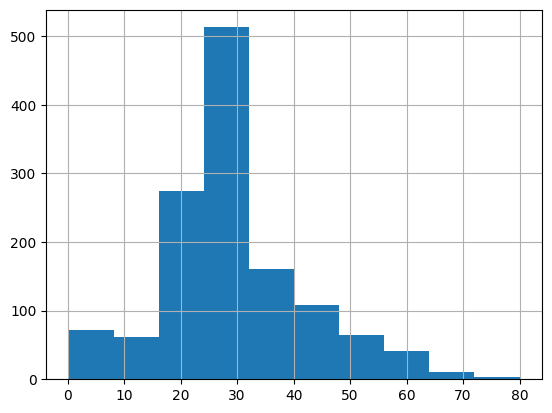

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(titanic_clean[["age"]])
#^2 brackets mean columns.1 means array 
titanic_clean['age'] = X[:,0]
titanic_clean.age.hist()


#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [19]:
from sklearn.preprocessing import OneHotEncoder
titanic_clean = titanic_clean[['sex','age','sibsp','parch','embarked','survived']]
ohe = OneHotEncoder(drop = "first",sparse_output=False)
X=ohe.fit_transform(titanic_clean[['embarked','sex']])
X



array([[0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 1.]])

In [23]:
titanic_clean[ohe.get_feature_names_out()]=X
titanic_clean = titanic_clean.drop(columns=['sex'])
titanic_clean = titanic_clean.drop(columns =['embarked_nan'])      
titanic_clean = titanic_clean.drop(columns =['embarked']) 

In [24]:
titanic_clean

,age,sibsp,parch,survived,embarked_Q,embarked_S,sex_male
0,29.0000,0,0,1,0.0,1.0,0.0
1,0.9167,1,2,1,0.0,1.0,1.0
2,2.0000,1,2,0,0.0,1.0,0.0
3,30.0000,1,2,0,0.0,1.0,1.0
4,25.0000,1,2,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1304,14.5000,1,0,0,0.0,0.0,0.0
1305,28.0000,1,0,0,0.0,0.0,0.0
1306,26.5000,0,0,0,0.0,0.0,1.0
1307,27.0000,0,0,0,0.0,0.0,1.0


#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression()
x = titanic_clean.drop("survived", axis =1 )
y = titanic_clean['survived']

results = cross_val_score(lr,X,y,cv = 5)

results

array([0.85114504, 0.80916031, 0.79770992, 0.70992366, 0.64750958])

In [27]:
np.mean(results)

np.float64(0.7630897019683544)

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

dtc = DecisionTreeClassifier()
x = titanic_clean.drop("survived", axis =1 )
y = titanic_clean['survived']

results = cross_val_score(dtc,X,y,cv = 5)

results

array([0.85114504, 0.80916031, 0.79770992, 0.70992366, 0.64750958])

In [29]:
np.mean(results)

np.float64(0.7630897019683544)

#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?